In [1]:
##Linear Discriminant Analysisi  
#@author:angela 

#Import functions needed
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score 
from sklearn.utils.class_weight import compute_class_weight
from matplotlib.lines import Line2D


In [2]:
#Current directory
os.getcwd()
#Change working directory
os.chdir('C:\\Users\\Administrador\\Desktop\\python')
os.listdir()

['.ipynb_checkpoints',
 'data.csv',
 'graficos',
 'Model_6800 pairs of DNA.ipynb',
 'model_DecisionTreeClassifier.ipynb',
 'model_hypercholesterolemia.ipynb']

In [3]:
#Loading data: 
pd.read_csv("data.csv", sep=";")
data = pd.read_csv("data.csv",sep=";")
data.head(10) #muestra las primeras 10 filas de la tabla

,n,f(vij/c0)obj,Subset,f(c0)ref,D3(Set1),V2(Set1),D3(Set2),V1(Set2),D3(Set3),D1(Set4)
0,1,0,t,0.325301,2.515821,0.24,3.37,0.1,3.03,58.64
1,2,0,t,0.325301,2.475821,0.24,3.33,0.1,2.99,120.59
2,3,0,t,0.325301,2.475821,-1.01,3.33,0.1,2.99,115.82
3,4,0,v,0.325301,1.735821,0.24,2.59,0.1,2.25,7.90
4,5,0,t,0.325301,0.955821,0.24,1.81,0.1,1.47,2.53
5,6,0,t,0.325301,0.805821,0.24,1.66,0.1,1.32,-20.15
6,7,0,t,0.325301,0.175821,0.24,1.03,0.1,0.69,-25.52
7,8,0,v,0.325301,-0.194179,-1.01,0.66,0.1,0.32,24.49
8,9,0,t,0.325301,-0.194179,0.24,0.66,0.1,0.32,24.49
9,10,0,t,0.325301,-0.604179,0.24,0.25,0.1,-0.09,-53.58


In [4]:
#Data Splitting:
Y= data.iloc[:,1]
X = data.iloc[:, 3:]
print(Y) 
print(X)


0         0
1         0
2         0
3         0
4         0
         ..
369253    0
369254    0
369255    0
369256    0
369257    0
Name: f(vij/c0)obj, Length: 369258, dtype: int64
        f(c0)ref  D3(Set1)  V2(Set1)  D3(Set2)  V1(Set2)  D3(Set3)  D1(Set4)
0       0.325301  2.515821      0.24      3.37       0.1      3.03     58.64
1       0.325301  2.475821      0.24      3.33       0.1      2.99    120.59
2       0.325301  2.475821     -1.01      3.33       0.1      2.99    115.82
3       0.325301  1.735821      0.24      2.59       0.1      2.25      7.90
4       0.325301  0.955821      0.24      1.81       0.1      1.47      2.53
...          ...       ...       ...       ...       ...       ...       ...
369253  0.000000 -1.889286     -0.07     -1.50       0.1     -1.42    -17.50
369254  0.000000 -1.889286     -0.07     -1.50       0.1     -1.42    -17.50
369255  0.000000 -2.209286     -0.07     -1.82       0.1     -1.74    -61.52
369256  0.000000 -2.209286     -0.07     -1.82   

In [7]:
#Splitting Data into Training and Prediction Sets:
train_data = data[data["Subset"] == "t"]
pred_data = data[data["Subset"] == "v"]

In [8]:
#Model Preparation for LDA:
X_train_lda= train_data.iloc[:, 3:]
X_test_lda = pred_data.iloc[:, 3:]
y_train_lda= train_data.iloc[:, 1]
y_test_lda= pred_data.iloc[:, 1]

print(X_test_lda.shape)
print(X_train_lda.shape)
print(y_test_lda.shape)
print(y_train_lda.shape)

(92314, 7)
(276944, 7)
(92314,)
(276944,)


In [9]:
#X_LDA
mlr_X_train_lda= X_train_lda[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]
mlr_X_test_lda = X_test_lda[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]

In [10]:
#Define the LDA model and prior probability
priors = [0.5,0.5]
lda_model = LinearDiscriminantAnalysis(priors=priors)

#Fit the model to initialize atributes
lda_model.fit(mlr_X_train_lda, y_train_lda)

LinearDiscriminantAnalysis(priors=[0.5, 0.5])

In [11]:
#Define the hyperparameter search space

param_grid = {
    'solver': ['lsqr'],
    'shrinkage': [None], 
    'priors' : [[0.5,0.5],[0.6,0.4],[0.55,0.45]
    ]
}

In [ ]:
#Perform hyperparameter search (GridSearch) by cross-validation
grid_search_lda= GridSearchCV(estimator=lda_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit model lda
grid_search_lda.fit(mlr_X_train_lda, y_train_lda)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(priors=[0.5, 0.5]),
             param_grid={'priors': [[0.5, 0.5], [0.6, 0.4], [0.55, 0.45]],
                         'shrinkage': [None], 'solver': ['lsqr']},
             scoring='accuracy')

In [13]:
#Get the best hyperparameters
best_params = grid_search_lda.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'priors': [0.5, 0.5], 'shrinkage': None, 'solver': 'lsqr'}


In [14]:
#make predictions on the train set
y_pred_train_lda = lda_model.predict(mlr_X_train_lda)
#calculate confusion matrix
cm_train_lda= confusion_matrix(y_train_lda, y_pred_train_lda)
print(cm_train_lda)
#calculate performance metrics
tn_train_lda, fp_train_lda, fn_train_lda, tp_train_lda = cm_train_lda.ravel()
specificity_train_lda = tn_train_lda / (tn_train_lda + fp_train_lda)
sensitivity_train_lda = tp_train_lda / (tp_train_lda + fn_train_lda)
accuracy_train_lda = (tp_train_lda + tn_train_lda) / (tp_train_lda + tn_train_lda + fp_train_lda + fn_train_lda)
false_positive_train_lda = fp_train_lda / (fp_train_lda + tn_train_lda)
print(specificity_train_lda, sensitivity_train_lda, accuracy_train_lda)

[[ 67194  25664]
 [ 46410 137676]]
0.7236210127291133 0.7478895733515857 0.7397524409266856


In [15]:
# make predictions on the test set
y_pred_test_lda = lda_model.predict(mlr_X_test_lda)
#calculate confusion matrix
cm_test_lda= confusion_matrix(y_test_lda, y_pred_test_lda)
print(cm_test_lda)
# calculate performance metrics
tn_test_lda, fp_test_lda, fn_test_lda, tp_test_lda = cm_test_lda.ravel()
specificity_test_lda = tn_test_lda / (tn_test_lda + fp_test_lda)
sensitivity_test_lda = tp_test_lda / (tp_test_lda + fn_test_lda)
accuracy_test_lda = (tp_test_lda + tn_test_lda) / (tp_test_lda + tn_test_lda + fp_test_lda + fn_test_lda)
false_positive_test_lda = fp_test_lda / (fp_test_lda + tn_test_lda)
print(specificity_test_lda, sensitivity_test_lda, accuracy_test_lda)

[[22388  8555]
 [15479 45892]]
0.7235238987816307 0.7477798960421046 0.7396494572870854


In [16]:
# Model coefficients 
coef = lda_model.coef_
intercept = lda_model.intercept_

print("Coefficients:", coef)
print("Intercept:", intercept)

Coefficients: [[ 6.34203444e+00 -6.19462683e-02 -3.12140580e-05  8.02171740e-02
  -5.43644964e-04  3.40355591e-02 -7.84199142e-04]]
Intercept: [-3.92649374]


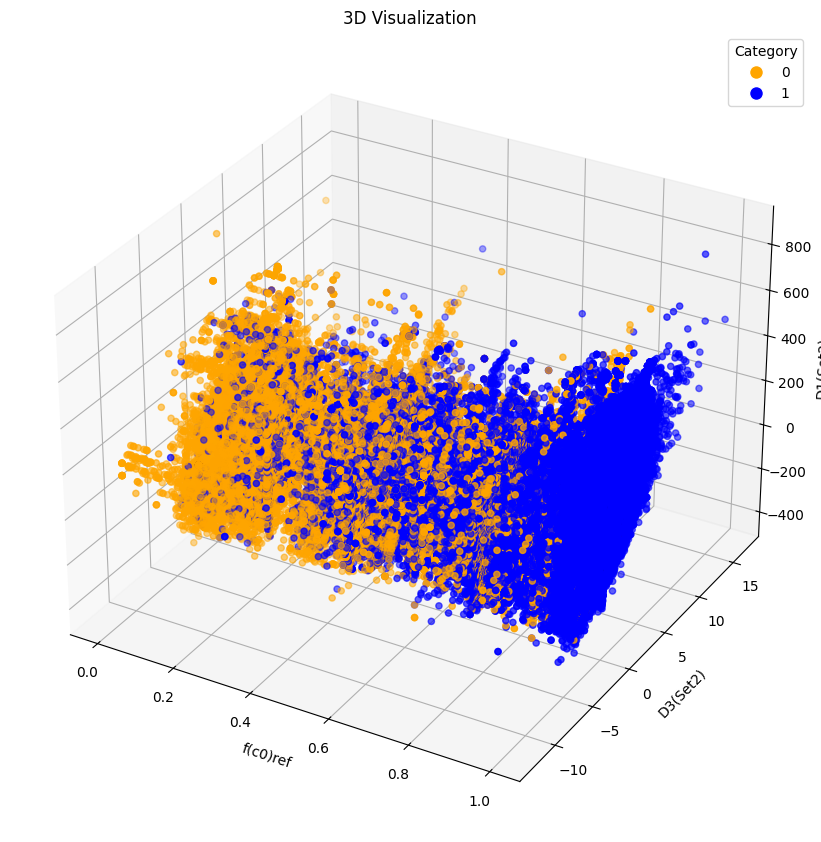

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Preparar los datos para el gráfico 3D usando tres variables específicas
mlr_X_train_lda = X[['f(c0)ref', 'D3(Set2)', 'D1(Set4)']]
y_train_lda = Y

# Crear un DataFrame para los datos seleccionados
df = pd.DataFrame(mlr_X_train_lda, columns=['f(c0)ref', 'D3(Set2)', 'D1(Set4)'])
df['Category'] = y_train_lda

# Definir los colores para las categorías
# Ajusta los nombres y colores según tus datos
category_colors = {0: 'orange', 1: 'blue'}  

# Configurar el gráfico 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
#ax.set_facecolor('#cad5db') ##Color del fondo

# Crear el gráfico de dispersión 3D
scatter = ax.scatter(df['f(c0)ref'], df['D3(Set2)'], df['D1(Set4)'], c=df['Category'].map(category_colors), label=df['Category'])

# Añadir etiquetas y título
ax.set_title('3D Visualization')
ax.set_xlabel('f(c0)ref')
ax.set_ylabel('D3(Set2)')
ax.set_zlabel('D1(Set2)')


# Añadir leyenda
legend_elements = [Line2D([0], [0], marker='o', color='w', label='0', markerfacecolor='orange', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='1', markerfacecolor='blue', markersize=10)]

ax.legend(handles=legend_elements, title="Category")
plt.subplots_adjust(left=0.2, right=20, top=0.9, bottom=0.1)



plt.show()

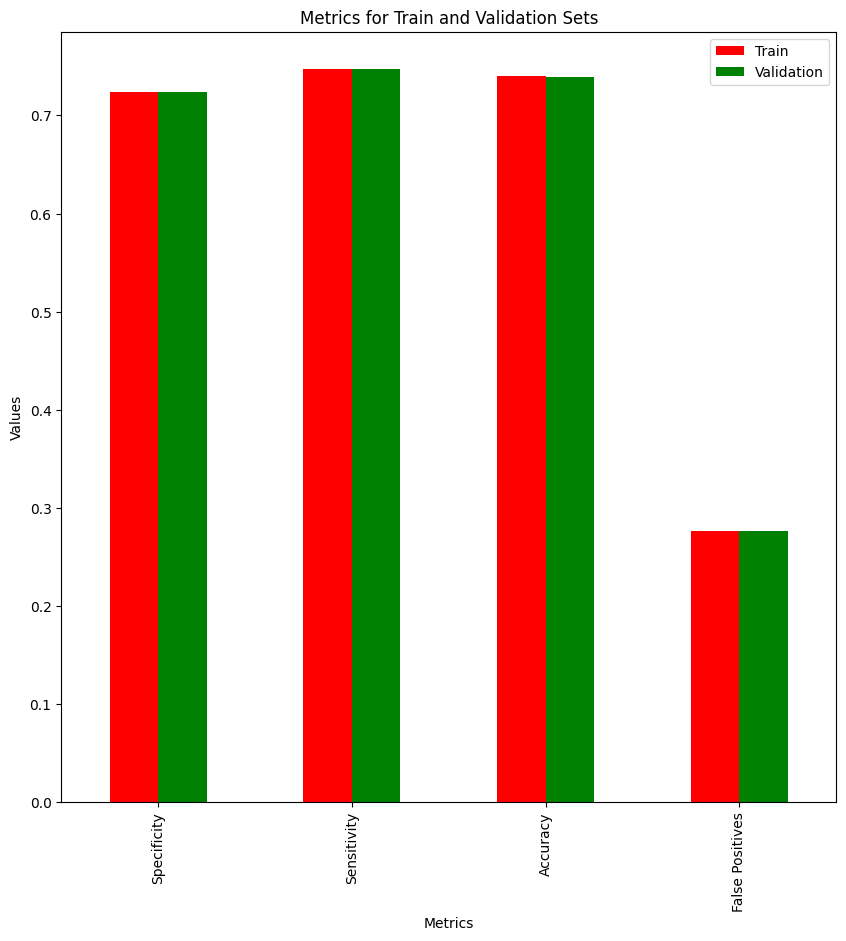

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Valores de especificidad, sensibilidad, accuracy y falsos positivos para el train test y el validation
metrics = {
    'Train': {
        'Specificity': specificity_train_lda,
        'Sensitivity': sensitivity_train_lda,
        'Accuracy': accuracy_train_lda,
        'False Positives': false_positive_train_lda
    },
    'Validation': {
        'Specificity': specificity_test_lda,
        'Sensitivity': sensitivity_test_lda,
        'Accuracy': accuracy_test_lda,
        'False Positives': false_positive_test_lda
    }
}

# Crear un DataFrame a partir de los datos
df = pd.DataFrame(metrics)

# Configurar el gráfico de barras
ax = df.plot(kind='bar', figsize=(10,10), color=['red', 'green'])  # Colores de las barras
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
plt.gcf().set_facecolor('white')


# Añadir etiquetas y título
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Metrics for Train and Validation Sets')

# Mostrar el gráfico
plt.show()
